In [ ]:
import csv, os, glob, shutil
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Organizing Dataset By Pathology

In [ ]:
#Variables

main_folder_path = '/content/drive/MyDrive/CheXpert'
csv_path = '/content/drive/MyDrive/CheXpert/val_labels.csv'
data_path = '/content/drive/MyDrive/CheXpert/val'

new_save_path = '/content/drive/MyDrive/test'

In [ ]:
#Open CSV file
df = pd.read_csv(csv_path)

In [ ]:
#Create new folders

#Get pathologies
pathologies = df.columns[6:]

if not os.path.isdir(new_save_path): os.mkdir(new_save_path)

#Create a new folder for each pathology
for pathology in pathologies:
  path = new_save_path + '/' + pathology
  if os.path.isdir(path): shutil.rmtree(path)
  os.mkdir(path)

In [ ]:
#For each row in data

for ind in df.index:

  if (df['Frontal/Lateral'][ind] == 'Frontal' and df['No Finding'][ind] == 0):

    detected_pathologies = [path for path in pathologies if df[path][ind] == 1]
    old_image_path = data_path + '/' + df['Path'][ind][20:]
    image_name = '_'.join([df['Path'][ind].split('/')[2], df['Path'][ind].split('/')[3], df['Path'][ind].split('/')[4][:-12]])
    image_name = ''.join([image_name, '.jpg'])
    
    for path in detected_pathologies:
        new_image_path = new_save_path + '/' + path + '/' + image_name
        shutil.copy(old_image_path, new_image_path)

In [ ]:
#Testing Code
print(df['Path'][ind])
print(image_name)
image_name = '_'.join([df['Path'][ind].split('/')[2], df['Path'][ind].split('/')[3], df['Path'][ind].split('/')[4][:-12]])
image_name = ''.join([image_name, '.jpg'])


CheXpert-v1.0/valid/patient64541/study1/view1_frontal.jpg
patient64541_study1_view1.jpg


Plotting and Saving GradCAM Maps of Images

In [ ]:
pkl_folder = '/content/drive/MyDrive/gradcam_maps_val/'

In [ ]:
#build gradcam folder system

#Open CSV file
df = pd.read_csv(csv_path)
#Create new folders
grad_folder_path = '/content/drive/MyDrive/gradcam'

#Get pathologies
pathologies = df.columns[6:]

if not os.path.isdir(grad_folder_path): os.mkdir(grad_folder_path)

#Create a new folder for each pathology
for pathology in pathologies:
  path = grad_folder_path + '/' + pathology
  if os.path.isdir(path): shutil.rmtree(path)
  os.mkdir(path)



/content/drive/MyDrive/gradcam_maps_val/patient64541_study1_view1_frontal_Enlarged Cardiomediastinum_map.pkl
True


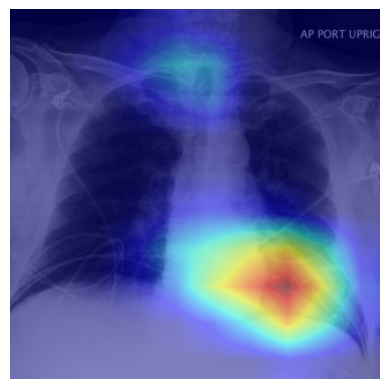

/content/drive/MyDrive/gradcam_maps_val/patient64541_study1_view1_frontal_Cardiomegaly_map.pkl
True


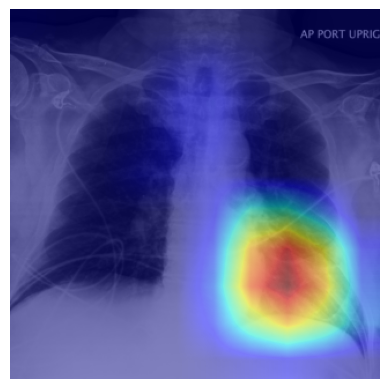

/content/drive/MyDrive/gradcam_maps_val/patient64541_study1_view1_frontal_Lung Opacity_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64543_study1_view1_frontal_Lung Opacity_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64545_study1_view1_frontal_Lung Opacity_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64546_study1_view1_frontal_Lung Opacity_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64547_study1_view1_frontal_Lung Opacity_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64547_study1_view2_frontal_Lung Opacity_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64548_study1_view1_frontal_Lung Opacity_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64552_study1_view1_frontal_Lung Opacity_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64555_study1_view1_frontal_Lung Opacity_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64557_study1_view1_frontal_Lung Opacity_map.

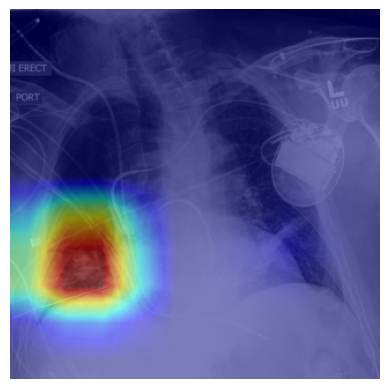

/content/drive/MyDrive/gradcam_maps_val/patient64543_study1_view1_frontal_Edema_map.pkl
True


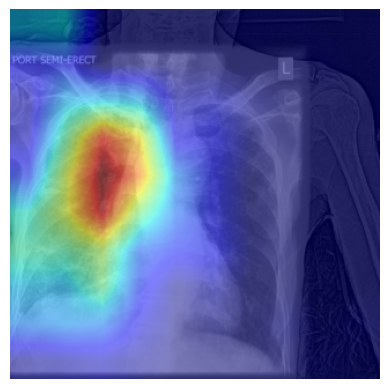

/content/drive/MyDrive/gradcam_maps_val/patient64548_study1_view1_frontal_Consolidation_map.pkl
True


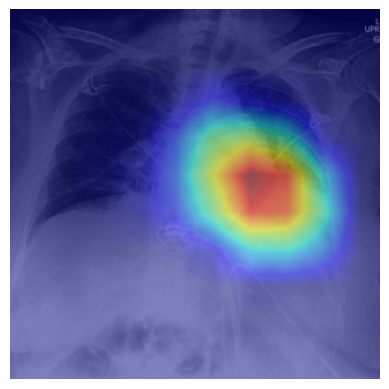

/content/drive/MyDrive/gradcam_maps_val/patient64548_study1_view1_frontal_Pneumonia_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64552_study1_view1_frontal_Pneumonia_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64579_study1_view1_frontal_Pneumonia_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64583_study1_view1_frontal_Pneumonia_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64652_study1_view1_frontal_Pneumonia_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64689_study1_view1_frontal_Pneumonia_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64692_study1_view1_frontal_Pneumonia_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64715_study1_view1_frontal_Pneumonia_map.pkl
False
/content/drive/MyDrive/gradcam_maps_val/patient64545_study1_view1_frontal_Atelectasis_map.pkl
True


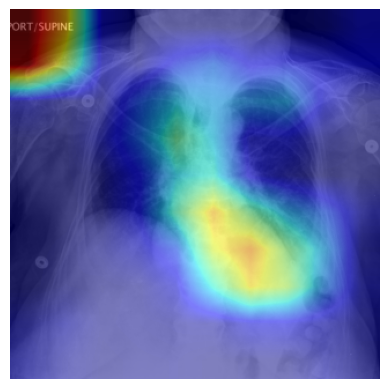

/content/drive/MyDrive/gradcam_maps_val/patient64547_study1_view1_frontal_Pneumothorax_map.pkl
True


KeyboardInterrupt: ignored

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

for pathology in pathologies:
  path = new_save_path + '/' + pathology + '/'
  for image in os.listdir(path):
    pkl_file = pkl_folder + image[:-4] + '_frontal_' + ' '.join(pathology.split(' ')) + '_map.pkl'
    print(pkl_file)
    print(os.path.exists(pkl_file))
    if os.path.exists(pkl_file):
      with open(pkl_file, 'rb') as f:
        saliency_map = pickle.load(f)

            # get the saliency map tensor and convert it to a numpy array
        saliency_map_tensor = saliency_map['map']
        saliency_map_array = saliency_map_tensor.detach().numpy()[0][0]

        # get the CXR image tensor and convert it to a numpy array
        cxr_img_tensor = saliency_map['cxr_img']
        cxr_img_array = cxr_img_tensor.detach().numpy().transpose((1,2,0))

        # plot the CXR image and overlay the saliency map
        plt.imshow(cxr_img_array)
        plt.imshow(saliency_map_array, alpha=0.5, cmap='jet')
        plt.axis('off')
        plt.show() 
         

      break

    